<a href="https://colab.research.google.com/github/lamechah/Flower_Classifier/blob/main/Image_Classification_Freezing_layers_input_size_224_DAUG_%2B_dropout_20_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1: Import required packages

we will need tensorflow, numpy, os and keras


In [ ]:
import os
import tensorflow as tf
import zipfile
from tensorflow.keras import layers
from tensorflow.keras import Model
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
from keras.datasets import cifar10
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical
from keras.applications.resnet50 import ResNet50
from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt


2.2.0


##Step 2: Import Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


# Set up directories for 17Flowers Dataset

In [ ]:
base_dir = '/content/gdrive/My Drive/Deep_Learning/ASS2_Mercedes_Speroni/dataset'
train_dir = os.path.join(base_dir, 'train_1')
validation_dir = os.path.join(base_dir, 'validation_1')
test_dir = os.path.join(base_dir, 'test_1')

##Step 3: preprocess ImagesAND PERFORM DATA AUGMENTATION

In [ ]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')


 ##(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
                                   ##horizontal_flip=True, fill_mode='nearest')
 

test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=64,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = valid_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=64,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=64,
        class_mode='categorical')

Found 680 images belonging to 17 classes.
Found 340 images belonging to 17 classes.
Found 340 images belonging to 17 classes.


### Step 4: Transfer learning

In [ ]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3))


from keras import models
from keras import layers
from keras import optimizers

# Load the CONV layers of VGG16 model and add the FC layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(17, activation=tf.nn.softmax))

In [ ]:
conv_base.summary()
for layer in conv_base.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in conv_base.layers:
    print(layer, layer.trainable)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 512)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_2 (Dense)              (None, 17)                4369      
Total params: 21,141,841
Trainable params: 13,506,577
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [ ]:
from keras.callbacks import ModelCheckpoint
##import tensorflow as tf

checkpoint = ModelCheckpoint('/content/gdrive/My Drive/Deep_Learning/ASS2_Mercedes_Speroni/Checkpoints/V6/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
## /content/gdrive/My Drive/42028-DL-CNN-2020/Week9-Lab9/weights_coco.h5
#filepath='/content/gdrive/My Drive/Deep_Learning/ASS2_Mercedes_Speroni/Checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
#checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', save_freq=1)

In [ ]:
#from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

##reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

##callbacks = [checkpoint, reduce_lr]



nb_train_samples = 680
nb_validation_samples = 340
epochs = 25
batch_size = 64


history = model.fit_generator(train_generator, steps_per_epoch = nb_train_samples // batch_size, epochs = epochs, 
                              callbacks = [checkpoint], 
                              validation_data = validation_generator,
                              validation_steps = nb_validation_samples // batch_size)



Epoch 1/25
10/10 [==============================] - 566s 57s/step - loss: 2.8164 - acc: 0.1250 - val_loss: 2.1955 - val_acc: 0.3500
Epoch 2/25
10/10 [==============================] - 515s 51s/step - loss: 1.9878 - acc: 0.4107 - val_loss: 1.4048 - val_acc: 0.5000
Epoch 3/25
10/10 [==============================] - 513s 51s/step - loss: 1.5725 - acc: 0.5179 - val_loss: 1.0770 - val_acc: 0.7101
Epoch 4/25
10/10 [==============================] - 514s 51s/step - loss: 1.0959 - acc: 0.6964 - val_loss: 0.6561 - val_acc: 0.7500
Epoch 5/25
10/10 [==============================] - 516s 52s/step - loss: 0.9548 - acc: 0.6916 - val_loss: 0.8658 - val_acc: 0.7754
Epoch 6/25
10/10 [==============================] - 528s 53s/step - loss: 0.7854 - acc: 0.7422 - val_loss: 0.5092 - val_acc: 0.8116
Epoch 7/25
10/10 [==============================] - 534s 53s/step - loss: 0.6626 - acc: 0.7922 - val_loss: 1.0831 - val_acc: 0.7563
Epoch 8/25
10/10 [==============================] - 512s 51s/step - loss: 0.

### Step 5:  Visualization of results 

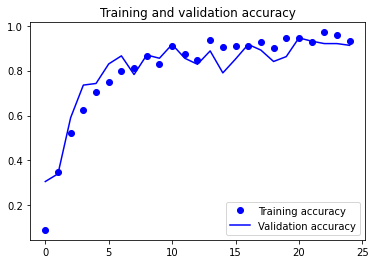

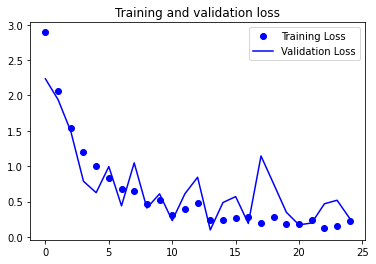

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Test your model on unseen data

In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.models import load_model

%matplotlib inline

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

# Import saved model 
V6 = load_model('/content/gdrive/My Drive/Deep_Learning/ASS2_Mercedes_Speroni/Checkpoints/V6/weights.19-0.23.hdf5', custom_objects={'softmax_v2': tf.nn.softmax})

##Testing on bluebell

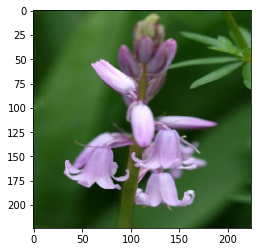

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
##load testing data

file_name = '/content/gdrive/My Drive/Deep_Learning/ASS2_Mercedes_Speroni/dataset/train_1/bluebell/image_0265.jpg'
img = image.load_img(file_name, target_size=(224, 224))
plt.imshow(img)
plt.show()
ary = image.img_to_array(img)
ary = np.expand_dims(ary, axis=0)

## predict model on unseen data
preds = V6.predict(preprocess_input(ary))
print(preds)

In [ ]:
classes = np.argmax(preds, axis=1)
print (classes)

[0]


In [ ]:

class_names =["Daffodil","Snowdrop","LilyValley","Bluebell","Crocus","Iris",
             "Tigerlily","Tulip","Fritillary","Sunflower","Daisy",
             "ColtsFoot","Dandelion","Cowslip","Buttercup","Windflower","Pansy"]

sorted_list = sorted(class_names)        
 
sorted_list[np.argmax(preds)]

'Bluebell'

##Testing on sunflower

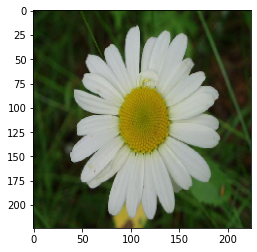

'Daisy'

In [ ]:
##load testing data

file_name = '/content/gdrive/My Drive/Deep_Learning/ASS2_Mercedes_Speroni/dataset/test_1/daisy/image_0806.jpg'
img = image.load_img(file_name, target_size=(224, 224))
plt.imshow(img)
plt.show()
ary = image.img_to_array(img)
ary = np.expand_dims(ary, axis=0)

## predict model on unseen data
preds = V6.predict(preprocess_input(ary))
##print(preds)
classes = np.argmax(preds, axis=1)

class_names =["Daffodil","Snowdrop","LilyValley","Bluebell","Crocus","Iris",
             "Tigerlily","Tulip","Fritillary","Sunflower","Daisy",
             "ColtsFoot","Dandelion","Cowslip","Buttercup","Windflower","Pansy"]

sorted_list = sorted(class_names)        
 
sorted_list[np.argmax(preds)]